# MFI Strategy--With Optimization Tool Integrated

/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_4193/3229883781.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_4193/3229883781.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sharpe=(return_rst[0]-return_rst[1])/(risk_rst[0]*100)
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_4193/3229883781.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk

,Long_Posi,Short_Posi,Close,change_perc,Position,Strategy
Datetime,,,,,,
2025-01-02 14:30:00+00:00,0,0,172.645004,NaN,0,NaN
2025-01-02 15:30:00+00:00,0,0,173.800003,0.006690,0,0.000000
2025-01-02 16:30:00+00:00,0,0,172.759995,-0.005984,0,-0.000000
2025-01-02 17:30:00+00:00,0,0,171.755005,-0.005817,0,-0.000000
2025-01-02 18:30:00+00:00,0,0,172.970001,0.007074,0,0.000000
...,...,...,...,...,...,...
2025-12-11 16:30:00+00:00,0,0,153.459000,0.010596,0,0.000000
2025-12-11 17:30:00+00:00,-200,0,153.449997,-0.000059,-200,0.000059
2025-12-11 18:30:00+00:00,0,0,153.925003,0.003096,0,0.000000


Strategy       7.256018
change_perc    0.960927
dtype: float64

Strategy       0.007024
change_perc    0.009410
dtype: float64

np.float64(8.961894429203209)

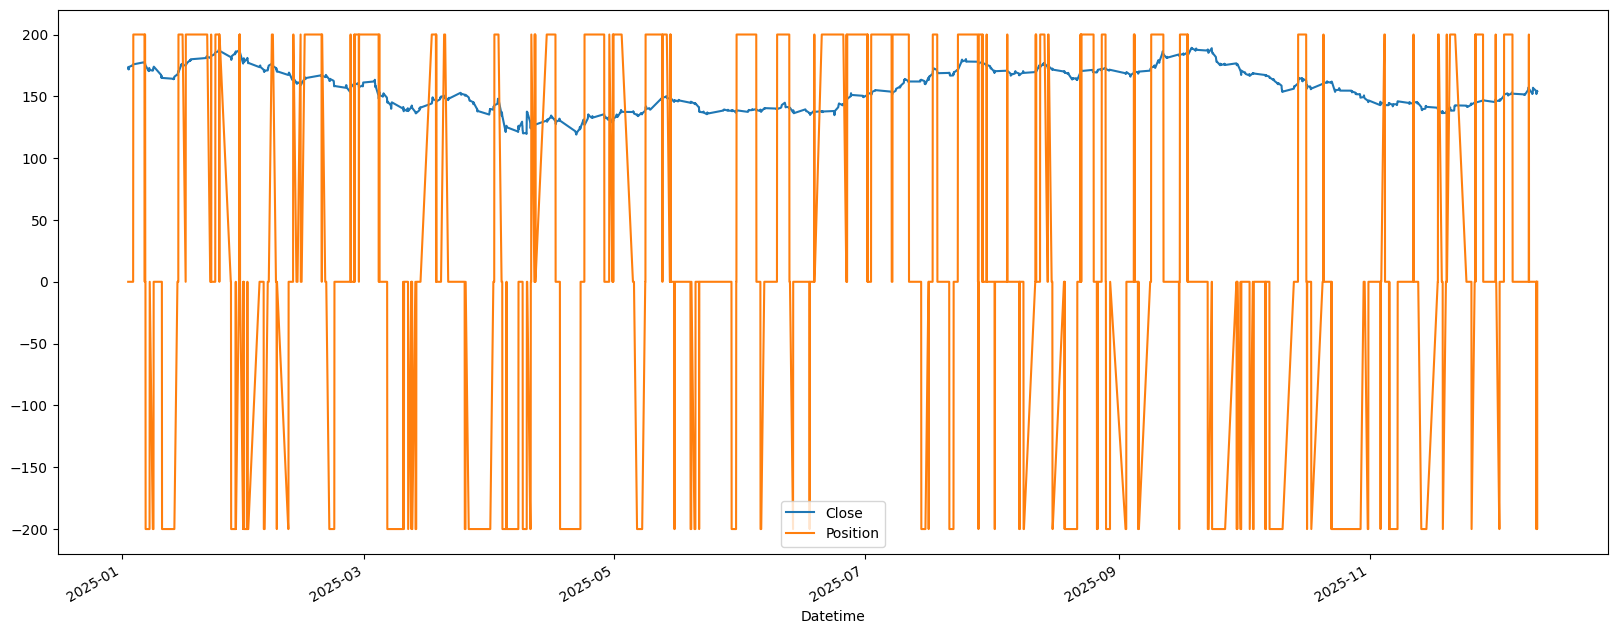

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np


def MFI_Strategy(stock,interval, start, end, boundary):
    df_1 = yf.download(stock, interval=interval, start=start, end=end)

    # Calculate using numpy arrays
    tp = (df_1['High'].values + df_1['Low'].values + df_1['Close'].values) / 3
    mf = tp * df_1['Volume'].values

    # Assign back to DataFrame
    df_1['TP'] = tp
    df_1['MF'] = mf

    # Continue with MFI calculation
    df_1['change_perc'] = df_1['Close'].pct_change()
    df_1['PMF'] = df_1['MF'].where(df_1['change_perc'] > 0, 0)
    df_1['NMF'] = df_1['MF'].where(df_1['change_perc'] < 0, 0)

    period = 14
    df_1['PMF_14'] = df_1['PMF'].rolling(window=period).sum()
    df_1['NMF_14'] = df_1['NMF'].rolling(window=period).sum()
    df_1['MR'] = df_1['PMF_14'] / df_1['NMF_14']
    df_1['MFI'] = 100 - (100 / (1 + df_1['MR']))


    df=pd.DataFrame()
    df.index=df_1.index
    df['Long_Posi']=0
    df['Short_Posi']=0
    trigger=0
    df['Long_Posi'] = np.where(df_1['MFI'] < (50-boundary),-200,0)

    df['Short_Posi']=np.where(df_1['MFI']>(50+boundary),200,0)
    df['Close']=df_1['Close']
    df['change_perc']=df_1['change_perc']
    df['Position']=df['Long_Posi']+df['Short_Posi']
    df['Strategy'] = df['change_perc'] * df['Position']
    df['Strategy']=df['Strategy']/200

    return_rst=df[['Strategy', 'change_perc']].sum().apply(np.exp)

    risk_rst=df[['Strategy','change_perc']].std()

#    df[['Close','Position']].plot(figsize=(20,8))
    sharpe=(return_rst[0]-return_rst[1])/(risk_rst[0]*100)
#    display(df)
 #   display(return_rst)
 #   display(risk_rst)

    return sharpe


def MFI_Strategy_visual(stock,interval, start, end, boundary):
    df_1 = yf.download(stock, interval=interval, start=start, end=end)

    # Calculate using numpy arrays
    tp = (df_1['High'].values + df_1['Low'].values + df_1['Close'].values) / 3
    mf = tp * df_1['Volume'].values

    # Assign back to DataFrame
    df_1['TP'] = tp
    df_1['MF'] = mf

    # Continue with MFI calculation
    df_1['change_perc'] = df_1['Close'].pct_change()
    df_1['PMF'] = df_1['MF'].where(df_1['change_perc'] > 0, 0)
    df_1['NMF'] = df_1['MF'].where(df_1['change_perc'] < 0, 0)

    period = 14
    df_1['PMF_14'] = df_1['PMF'].rolling(window=period).sum()
    df_1['NMF_14'] = df_1['NMF'].rolling(window=period).sum()
    df_1['MR'] = df_1['PMF_14'] / df_1['NMF_14']
    df_1['MFI'] = 100 - (100 / (1 + df_1['MR']))


    df=pd.DataFrame()
    df.index=df_1.index
    df['Long_Posi']=0
    df['Short_Posi']=0
    trigger=0
    df['Long_Posi'] = np.where(df_1['MFI'] < (50-boundary),-200,0)

    df['Short_Posi']=np.where(df_1['MFI']>(50+boundary),200,0)
    df['Close']=df_1['Close']
    df['change_perc']=df_1['change_perc']
    df['Position']=df['Long_Posi']+df['Short_Posi']
    df['Strategy'] = df['change_perc'] * df['Position']
    df['Strategy']=df['Strategy']/200

    return_rst=df[['Strategy', 'change_perc']].sum().apply(np.exp)

    risk_rst=df[['Strategy','change_perc']].std()

    df[['Close','Position']].plot(figsize=(20,8))
    sharpe=(return_rst[0]-return_rst[1])/(risk_rst[0]*100)
    display(df)
    display(return_rst)
    display(risk_rst)





# optimizeer
max_sr=1
for bdr in range (10,40):
    sharpe_rt=MFI_Strategy('BX','1h','2025-01-01','2025-12-12',bdr)
    if sharpe_rt > max_sr:
        max_sr=sharpe_rt
        final_bdr = bdr
# final visualization
sharpe_rt=MFI_Strategy_visual('BX','1h','2025-01-01','2025-12-12',final_bdr)


display(max_sr)

#noted that boundary can ber converted into a percent of 100, which represent the relative importance of risk and return of that strategy, 0<=boundary<=50, with a higher value represent a high weight put on risk